In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [7]:
bc_data = load_breast_cancer()

In [8]:
bc = pd.DataFrame(bc_data.data,columns=bc_data.feature_names)
bc["target"] = bc_data.target


In [9]:
bc.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [13]:
bc.columns = bc.columns.str.replace(' ','_')

In [20]:
string = 'Nimisha Pandey'
string.replace('i', '$$')

'N$$m$$sha Pandey'

In [24]:
# Option use a loop 
bc.columns.str.replace(' ','_')

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [14]:
bc.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

# Study the Target Distribution 

## Frequency Table

In [16]:
bc.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

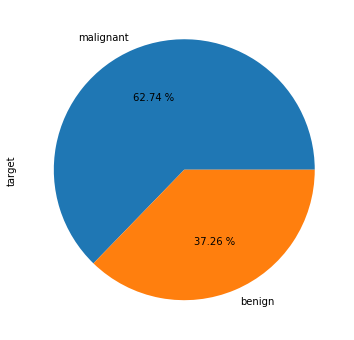

In [31]:
plt.figure(figsize = (10,6))
bc.target.value_counts().plot.pie(autopct = '%1.2f %%', labels = bc_data.target_names)
plt.show()

    - 1 --> Benign
    - 0 --> Malignant 

# train test split

In [34]:
from sklearn.model_selection import train_test_split as split

train, test = split(bc, train_size = 0.75, random_state = 123)

In [36]:
train.shape

(426, 31)

In [37]:
test.shape

(143, 31)

# visualize the relationship 

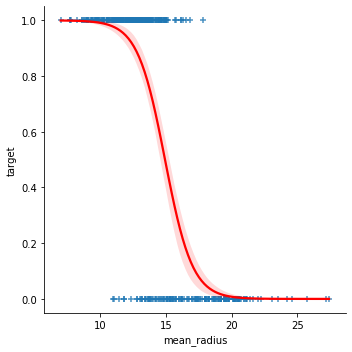

In [49]:
#f,ax = plt.subplots(1,1,figsize = (20,5))
sns.lmplot('mean_radius', 'target', data = train, logistic= True, line_kws = {'color': 'r'}, markers = '+')
plt.show()

# sklearn 

In [50]:
from sklearn.linear_model import LogisticRegression

In [166]:
# create model object 
lr_bc = LogisticRegression(max_iter= 1900)

X_bc = train.drop('target', axis = 1)
Y_bc = train.target

lr_bc.fit(X_bc,Y_bc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
print('Intercept = {} \nCoefficients : \n{}'.format( lr.intercept_,lr.coef_))

Intercept = [32.76431197] 
Coefficients : 
[[ 0.84281826  0.2174093  -0.32387221  0.02560404 -0.17173477 -0.23221277
  -0.48938503 -0.26088578 -0.24600852 -0.03439396 -0.03823172  1.44776108
   0.22166791 -0.11150374 -0.02466139  0.05053687 -0.04733187 -0.03312717
  -0.03289129  0.01084026 -0.08743834 -0.47455605 -0.0976258  -0.00990522
  -0.34057592 -0.66932489 -1.34794361 -0.5518488  -0.66189642 -0.09529476]]


In [167]:
print('Accuracy : {:.2f}%'.format( lr_bc.score(X_bc,Y_bc)*100 ))

Accuracy : 95.31%


In [168]:
print('predicted class :' , lr_bc.predict(test.drop('target', axis = 1)), sep = '\n')
pred_bc = lr_bc.predict(test.drop('target', axis = 1))

predicted class :
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0]


# german credit data

In [101]:
gc = pd.read_csv('germancredit.csv')

In [102]:
gc.head()

Default checkingstatus1  duration history purpose  amount savings employ  \
0        0             A11         6     A34     A43    1169     A65    A75   
1        1             A12        48     A32     A43    5951     A61    A73   
2        0             A14        12     A34     A46    2096     A61    A74   
3        0             A11        42     A32     A42    7882     A61    A74   
4        1             A11        24     A33     A40    4870     A61    A73   

   installment status  ... residence  property age  otherplans housing cards  \
0            4    A93  ...         4      A121  67        A143    A152     2   
1            2    A92  ...         2      A121  22        A143    A152     1   
2            2    A93  ...         3      A121  49        A143    A152     1   
3            2    A93  ...         4      A122  45        A143    A153     1   
4            3    A93  ...         4      A124  53        A143    A153     2   

    job liable  tele foreign  
0  A173      1  A192    A201  
1  A173      1  A191    A201  
2  A172      2  A191    A201  
3  A173      2  A191    A201  
4  A173      2  A191    A201  

[5 rows x 21 columns]

# Handling Categorical Data

In [120]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer, OneHotEncoder
le = LabelEncoder()
gc.apply(le.fit_transform).head()

Default  checkingstatus1  duration  history  purpose  amount  savings  \
0        0                0         2        4        4     142        4   
1        1                1        29        2        4     770        0   
2        0                3         8        4        7     390        0   
3        0                0        26        2        3     848        0   
4        1                0        17        3        0     734        0   

   employ  installment  status  ...  residence  property  age  otherplans  \
0       4            3       2  ...          3         0   48           2   
1       2            1       1  ...          1         0    3           2   
2       3            1       2  ...          2         0   30           2   
3       3            1       2  ...          3         1   26           2   
4       2            2       2  ...          3         3   34           2   

   housing  cards  job  liable  tele  foreign  
0        1      1    2       0     1        0  
1        1      0    2       0     0        0  
2        1      0    1       1     0        0  
3        2      0    2       1     0        0  
4        2      1    2       1     0        0  

[5 rows x 21 columns]

In [114]:
lb = LabelBinarizer()
lb.fit_transform(gc.checkingstatus1)
#gc.apply(lb.fit_transform)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [126]:
ohe = OneHotEncoder()
ohe.fit_transform(gc).toarray()

array([[1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

# Dummy variables 

In [154]:
gc_dummy = pd.get_dummies(gc)

# LogisticRegression

In [191]:
train_gc , test_gc = split(gc_dummy, test_size = 0.25, random_state = 12)
lr = LogisticRegression(max_iter=1000)
X_gc = train_gc.drop('Default', axis = 1)
Y_gc = train_gc.Default
lr.fit(X_gc,Y_gc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
print('Intercept = {} \nCoefficients : \n{}'.format( lr.intercept_,lr.coef_))

Intercept = [-0.54638975] 
Coefficients : 
[[ 2.37214793e-02  1.36528721e-04  3.29441271e-01 -8.03601865e-03
  -1.26136414e-02 -3.84101633e-02  3.87152332e-02  6.42507790e-01
   1.19554787e-01 -3.61416155e-01 -9.06827723e-01  5.14805928e-01
   2.58713117e-01 -1.66782385e-01 -5.86586924e-02 -1.05425927e+00
   6.41267812e-01 -8.82014228e-01 -1.67941199e-01 -2.72047958e-01
  -5.25355819e-01  6.93943149e-02  2.25417540e-01  5.37626114e-01
  -9.33356008e-02 -3.91922761e-02  2.98924630e-01  1.98357116e-01
   8.93328411e-02 -3.60530512e-01 -7.32265376e-01 -1.02864295e-01
   1.34883102e-01 -2.22098365e-02 -5.23364112e-01  7.37384128e-03
   1.95390015e-01 -2.67276778e-02 -4.48333340e-01 -2.26510298e-01
  -3.12644084e-02  1.48272321e-01 -6.23189214e-01 -1.44133454e-01
  -2.78895028e-01 -1.44789148e-01  6.16363303e-02 -5.85615449e-02
   1.78079843e-01 -6.25699599e-01  1.29995314e-01 -4.91025779e-01
  -1.45150836e-01  1.02544115e-01 -1.36818585e-01 -7.36547578e-02
  -3.98252073e-01  1.78100405e-02

In [193]:
lr.score(X_gc, Y_gc)

0.8026666666666666

In [194]:
pred_gc = (lr.predict(test_gc.drop('Default', axis = 1)))

# Evaluation Metrics

## Confusion matrix : Actual vs Predicted : gc

In [161]:
pd.crosstab(columns = test_gc.Default, index = pred_gc)

Default    0   1
row_0           
0        150  49
1         15  36

## Confusion matrix : Actual vs Predicted : bc

In [175]:
print('Accuracy : {:.2f}%'.format(lr_bc.score(test.drop('target', axis = 1), test.target)*100))
pd.crosstab(columns = test.target, index = pred_bc)

Accuracy : 98.60%


target   0   1
row_0         
0       52   0
1        2  89

In [177]:
print('Accuracy : {:.2f}%'.format(lr_bc.score(train.drop('target', axis = 1), train.target)*100))
pd.crosstab(columns = train.target, index = lr_bc.predict(train.drop('target',axis = 1)))

Accuracy : 95.31%


target    0    1
row_0           
0       146    8
1        12  260

In [178]:
from sklearn.linear_model import LogisticRegressionCV

In [185]:
lr_cv = LogisticRegressionCV(cv = 5,max_iter=5000)

In [186]:
lr_cv.fit(X,Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=5000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

# Accuracy 

In [187]:
from sklearn.metrics import classification_report

In [188]:
print(classification_report(y_true = test_gc.Default, y_pred = pred_gc, target_names= ['Non Default','Default'],))

              precision    recall  f1-score   support

 Non Default       0.75      0.91      0.82       165
     Default       0.71      0.42      0.53        85

    accuracy                           0.74       250
   macro avg       0.73      0.67      0.68       250
weighted avg       0.74      0.74      0.72       250



In [189]:
from sklearn.metrics import roc_auc_score, roc_curve

In [212]:
prob = lr.predict_proba(test_gc.drop('Default', axis = 1))
prob

array([[0.68767958, 0.31232042],
       [0.96905494, 0.03094506],
       [0.91366899, 0.08633101],
       [0.19002568, 0.80997432],
       [0.93441025, 0.06558975],
       [0.58385405, 0.41614595],
       [0.42969843, 0.57030157],
       [0.05862859, 0.94137141],
       [0.72428767, 0.27571233],
       [0.38402137, 0.61597863],
       [0.7873298 , 0.2126702 ],
       [0.53065596, 0.46934404],
       [0.69925649, 0.30074351],
       [0.98334365, 0.01665635],
       [0.59945741, 0.40054259],
       [0.61701623, 0.38298377],
       [0.91072793, 0.08927207],
       [0.10115153, 0.89884847],
       [0.57884776, 0.42115224],
       [0.9732904 , 0.0267096 ],
       [0.66448817, 0.33551183],
       [0.97698865, 0.02301135],
       [0.81568978, 0.18431022],
       [0.18945731, 0.81054269],
       [0.54260721, 0.45739279],
       [0.88944517, 0.11055483],
       [0.69090087, 0.30909913],
       [0.8526843 , 0.1473157 ],
       [0.90414046, 0.09585954],
       [0.79942458, 0.20057542],
       [0.

In [197]:
prob_0 = prob[:, 0]
prob_1 = prob[:, 1]

In [200]:
fpr, tpr, threshold = roc_curve(y_true = test_gc.Default, y_score = prob_1, pos_label=1)

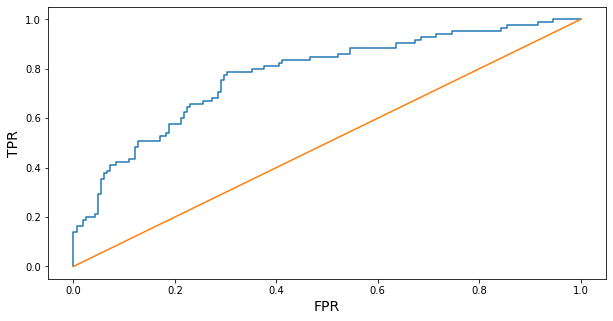

In [209]:
plt.figure(figsize = (10,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR', size = 14)
plt.ylabel('TPR', size = 14)
plt.show()

In [211]:
roc_auc_score(y_true = test_gc.Default, y_score = prob_1)

0.7759001782531195

# Decision Trees

In [232]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [231]:
dt = DecisionTreeClassifier()

dt.fit(train_gc.drop('Default', axis = 1), train_gc.Default)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [217]:
dt.predict(test_gc.drop('Default', axis = 1))

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1])

In [219]:
dt.predict_proba(test_gc.drop('Default', axis = 1))

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

# cardiotocography data

In [221]:
cardio = pd.read_csv('Cardiotocography Dataset.csv')

In [222]:
cardio.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  ...  \
0  120  0.000000  0.0  0.000000  0.000000  0.0  0.0    73   0.5    43  ...   
1  132  0.006380  0.0  0.006380  0.003190  0.0  0.0    17   2.1     0  ...   
2  133  0.003322  0.0  0.008306  0.003322  0.0  0.0    16   2.1     0  ...   
3  134  0.002561  0.0  0.007682  0.002561  0.0  0.0    16   2.4     0  ...   
4  132  0.006515  0.0  0.008143  0.000000  0.0  0.0    16   2.4     0  ...   

   Min  Max  Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  NSP  
0   62  126     2       0   120   137     121        73         1    2  
1   68  198     6       1   141   136     140        12         0    1  
2   68  198     5       1   141   135     138        13         0    1  
3   53  170    11       0   137   134     137        13         1    1  
4   53  170     9       0   137   136     138        11         1    1  

[5 rows x 22 columns]

In [223]:
cardio_train, cardio_test = split(cardio, test_size = 0.30, random_state = 12)

In [234]:
dt.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [235]:
pred_class = dt.predict(cardio_test.drop('NSP', axis = 1))

In [236]:
pred_prob = dt.predict_proba(cardio_test.drop('NSP', axis = 1))

In [237]:
import graphviz

In [246]:
dot_data = export_graphviz(dt, out_file= None, feature_names= cardio_train.drop('NSP', axis = 1).columns,
               class_names = ['Normal','Suspect','Pathological'], filled= True, rounded = True)
graph = graphviz.Source(dot_data)
graph.render('cardio')

In [247]:
from sklearn.tree import plot_tree

In [257]:
plt.figure(figsize = (200,100))
plot_tree(dt, feature_names= cardio_train.drop('NSP', axis = 1).columns,
               class_names = ['Normal','Suspect','Pathological'], filled= True, rounded = True, fontsize  = 25)
plt.savefig('cardio.png')
plt.show()

# K Nearest Neighbor

### Standardization of datasets

In [273]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_std = sc.fit_transform(cardio_train.drop('NSP', axis = 1))
test_std = sc.fit_transform(cardio_test.drop('NSP', axis = 1))

from sklearn.neighbors import KNeighborsClassifier

for k in range(4,30,3):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(train_std, cardio_train.NSP)
    accuracy = knn.score(test_std, cardio_test.NSP)*100
    print('For k = {:2d} Accuracy = {:.2f} %'.format(k, accuracy))

For k =  4 Accuracy = 87.30 %
For k =  7 Accuracy = 86.99 %
For k = 10 Accuracy = 86.68 %
For k = 13 Accuracy = 87.46 %
For k = 16 Accuracy = 86.68 %
For k = 19 Accuracy = 86.83 %
For k = 22 Accuracy = 86.36 %
For k = 25 Accuracy = 86.36 %
For k = 28 Accuracy = 85.42 %


# Naive Bayes Model 

In [274]:
cardio_test.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  ...  \
1649  132  0.006749  0.0  0.010124  0.012373  0.0  0.0    56   2.9     0  ...   
1971  138  0.005994  0.0  0.004995  0.000000  0.0  0.0    59   0.8     0  ...   
1264  119  0.003820  0.0  0.006686  0.000000  0.0  0.0    24   1.4     2  ...   
1103  122  0.006972  0.0  0.002988  0.000000  0.0  0.0    19   2.3     0  ...   
1009  122  0.002433  0.0  0.000000  0.007299  0.0  0.0    12   3.6     0  ...   

      Min  Max  Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  NSP  
1649   60  186     7       0   144   114     139       103         0    1  
1971  125  168     3       0   148   144     146         6         0    1  
1264  103  145     1       0   125   124     126         4         0    1  
1103  104  157     2       1   125   127     128         8         0    1  
1009   51  180     7       1   122   119     122        79         0    1  

[5 rows x 22 columns]

In [275]:
from sklearn.naive_bayes import GaussianNB

In [276]:
gnb = GaussianNB()

In [277]:
gnb.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)

GaussianNB(priors=None, var_smoothing=1e-09)

In [278]:
gnb.class_count_

array([1173.,  199.,  116.])

In [282]:
gnb.classes_


array([1, 2, 3])

In [283]:
gnb.predict(cardio_test.drop('NSP', axis = 1))

array([3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       3, 2, 3, 3, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2,

In [285]:
gnb.score(cardio_test.drop('NSP', axis = 1), cardio_test.NSP)

0.799373040752351

In [286]:
from sklearn.metrics import confusion_matrix

In [288]:
mat = confusion_matrix(y_true=cardio_test.NSP, y_pred = gnb.predict(cardio_test.drop('NSP', axis = 1)))


In [291]:
mat.T

array([[395,  14,   3],
       [ 62,  82,  24],
       [ 25,   0,  33]])

In [292]:
confusion_mat = pd.crosstab(columns = cardio_test.NSP, index = gnb.predict(cardio_test.drop('NSP', axis = 1)))

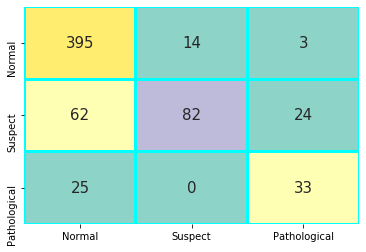

In [319]:
sns.heatmap(mat.T, cmap='Set3',annot=True, fmt = 'd', annot_kws= {'size': 15}, cbar= False, linewidths= 2, linecolor= 'aqua',
           xticklabels=['Normal','Suspect','Pathological'], yticklabels=['Normal','Suspect','Pathological'])
plt.xlabel('')
plt.ylabel('')
plt.show()

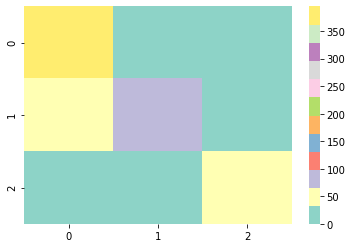

In [296]:
sns.heatmap(mat.T, cmap='Set3')

# SVM

In [63]:
from sklearn.datasets import load_iris 

iris_d = load_iris()

import pandas as pd
iris = pd.DataFrame(iris_d.data, columns = iris_d.feature_names)

iris['target']= iris_d.target

iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [64]:
iris_d.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width', 'target']

# visualise the data

In [8]:
import matplotlib.pyplot as plt

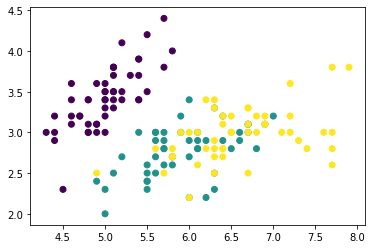

In [26]:
plt.scatter(iris.sepal_length, iris.sepal_width, c = iris.target)
plt.show()

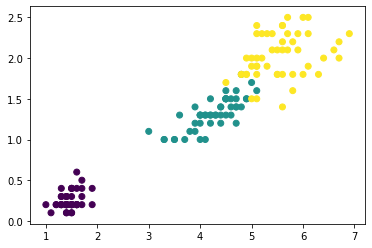

In [15]:
plt.scatter(iris.petal_length, iris.petal_width, c = iris.target)
plt.show()

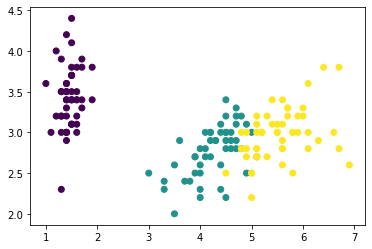

In [27]:
plt.scatter(iris.petal_length, iris.sepal_width, c = iris.target)
plt.show()

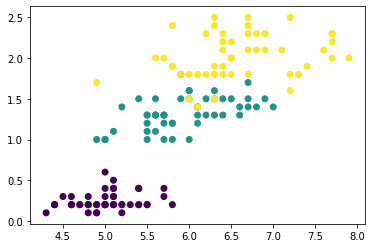

In [28]:
plt.scatter(iris.sepal_length, iris.petal_width, c = iris.target)
plt.show()

## standardise the data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [34]:
x_std = sc.fit_transform(iris[['petal_length','petal_width']])

In [36]:
from sklearn.svm import SVC

In [38]:
classifier = SVC(kernel = 'linear')
classifier.fit(x_std, iris.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

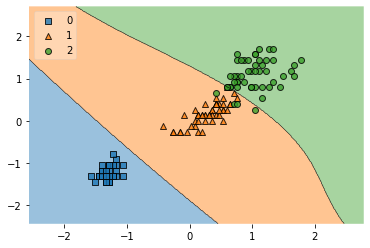

In [66]:
import numpy as np
y = np.array(iris.target)
from mlxtend.plotting import plot_decision_regions
x_std = sc.fit_transform(iris[['petal_length','petal_width']])
classifier = SVC(kernel = 'poly')
classifier.fit(x_std, iris.target)
plot_decision_regions(x_std, y, clf = classifier, legend = 2)
plt.show()

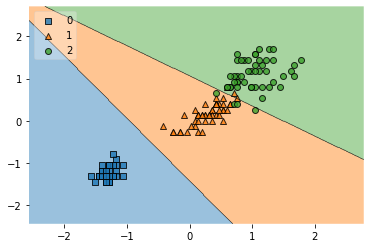

In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
x_std = sc.fit_transform(iris[['petal_length','petal_width']])
classifier = LogisticRegression()
classifier.fit(x_std, iris.target)
plot_decision_regions(x_std, y, clf = classifier, legend = 2)
plt.show()

/usr/local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:326: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  framealpha=0.3, scatterpoints=1, loc=legend)


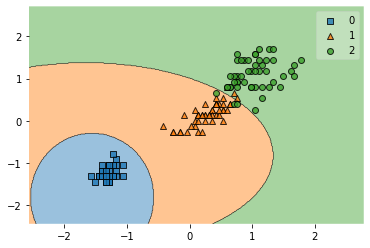

In [71]:
# NB 
from sklearn.naive_bayes import GaussianNB
x_std = sc.fit_transform(iris[['petal_length','petal_width']])
classifier = GaussianNB()
classifier.fit(x_std, iris.target)
plot_decision_regions(x_std, y, clf = classifier, legend = 'upper')
plt.show()

In [73]:
x_std = sc.fit_transform(iris.drop('target', axis = 1))
classifier = SVC(kernel = 'linear')
classifier.fit(x_std, iris.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
classifier.score(x_std, iris.target)

0.96

# Random Forest

In [74]:
cardio = pd.read_csv('Cardiotocography Dataset.csv')

In [75]:
cardio.shape

(2126, 22)

In [76]:
from sklearn.model_selection import train_test_split as split
cardio_train, cardio_test = split(cardio, test_size = 0.30, random_state = 12)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
int(22*0.4)

8

In [81]:
22**.5

4.69041575982343

In [82]:
rf = RandomForestClassifier(n_estimators=10,max_features= 'auto',
                           oob_score=True, random_state = 12)

In [84]:
rf.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=12, verbose=0,
                       warm_start=False)

In [85]:
rf.base_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
 rf.oob_score_ # generalised accuracy when using oob estimates 

8.803763440860212

In [96]:
# out of bag error 
(1 -  rf.oob_score_) *100

8.803763440860212

In [129]:
# plot max features against oob error

In [91]:
rf.score(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)

0.9952956989247311

In [130]:
error =[]
for i in range(1, cardio_train.shape[1]):
    rf = RandomForestClassifier(n_estimators=50,max_features= i,
                           oob_score=True, random_state = 12)
    rf.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)
    tr_predict = rf.predict(cardio_train.drop('NSP', axis = 1))
    error.append((1 -  rf.oob_score_) *100)
    

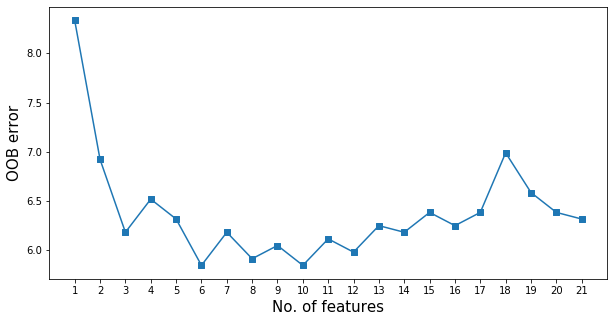

In [133]:
plt.figure(figsize = (10,5))
plt.scatter(x = range(1, cardio_train.shape[1]), y = error, marker =',' )
plt.plot( range(1, cardio_train.shape[1]), error)
plt.xticks(range(1, cardio_train.shape[1]))
plt.xlabel('No. of features', size =15)
plt.ylabel('OOB error', size =15)
plt.show()

In [136]:
rf = RandomForestClassifier(n_estimators=50,max_features= 3,
                           oob_score=True, random_state = 12)
rf.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)
rf.feature_importances_

array([0.0363304 , 0.04794458, 0.02005317, 0.05372201, 0.01106455,
       0.00112054, 0.06103479, 0.1015374 , 0.10303258, 0.11545478,
       0.04579195, 0.04347624, 0.04110453, 0.03046881, 0.01999596,
       0.00549467, 0.066227  , 0.08458419, 0.06646192, 0.03670197,
       0.00839796])

In [139]:
cardio.columns[rf.feature_importances_.argmax()]

'ALTV'

In [140]:
cardio.columns[rf.feature_importances_.argmin()]

'DS'

In [142]:
rf = RandomForestClassifier(n_estimators=50,max_features= 3,
                           oob_score=True, random_state = 12)
rf.fit(cardio_train.drop('NSP', axis = 1), cardio_train.NSP)
predicted = rf.predict(cardio_test.drop('NSP', axis = 1))

In [144]:
from mlxtend.plotting import plot_confusion_matrix

In [143]:
(pd.crosstab(index =predicted, columns=cardio_test.NSP ))

NSP      1   2   3
row_0             
1      473  25   2
2        9  68  12
3        0   3  46

In [145]:
from sklearn.metrics import confusion_matrix

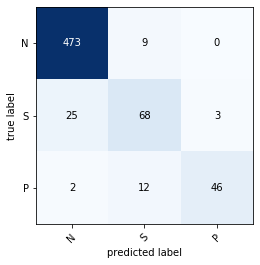

In [153]:
plot_confusion_matrix(confusion_matrix(y_pred =predicted, y_true = cardio_test.NSP,),class_names = ['N','S','P'])
plt.show()